In [63]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPARATION

In [64]:
with open("player_stats.pkl", "rb") as f:
    total_stats = pickle.load(f)

In [65]:
#tolgo seasons che non ci servono
total_stats=total_stats[total_stats["SEASON_ID"]>2003]
total_stats=total_stats[total_stats["SEASON_ID"]<2022]

In [66]:
#sposto la colonna MVP per prima per comodita 
cols = total_stats.columns.tolist()
cols = cols[-2:] + cols[:-2]
total_stats=total_stats[cols]
total_stats

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
7,0.0,12,949,2004,1610612737,27.0,53,1955.0,383,790,0.485,5,23,0.217,294,334,0.880,141,354,495,127,44,19,131,147,1065
8,0.0,10,949,2004,1610612757,27.0,32,729.0,118,264,0.447,4,11,0.364,79,95,0.832,48,96,144,47,24,18,53,75,319
9,0.0,13,949,2005,1610612757,28.0,54,1868.0,337,670,0.503,15,39,0.385,220,254,0.866,123,269,392,111,49,26,117,150,909
10,0.0,8,949,2006,1610612758,29.0,72,1961.0,332,632,0.525,5,22,0.227,218,278,0.784,106,251,357,149,48,42,108,227,887
11,0.0,11,949,2007,1610612758,30.0,80,2015.0,310,654,0.474,3,20,0.150,170,234,0.726,122,276,398,109,53,40,116,243,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,0.0,11,1627826,2018,1610612747,21.0,43,410.0,61,122,0.500,0,1,0.000,39,51,0.765,45,78,123,25,8,15,26,47,161
5977,0.0,10,1627826,2019,1610612747,22.0,33,516.0,112,193,0.580,0,0,0.000,57,66,0.864,54,108,162,25,4,27,33,73,281
5978,0.0,8,1627826,2019,1610612746,22.0,26,524.0,100,186,0.538,0,0,0.000,44,60,0.733,61,139,200,38,10,24,37,64,244
5979,0.0,2,1627826,2020,1610612746,23.0,72,1326.0,236,385,0.613,0,2,0.000,124,166,0.747,197,346,543,82,16,66,61,168,596


In [67]:
total_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9737 entries, 7 to 5980
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MVP         9737 non-null   float64
 1   CONF_RANK   9737 non-null   object 
 2   PLAYER_ID   9737 non-null   object 
 3   SEASON_ID   9737 non-null   int64  
 4   TEAM_ID     9737 non-null   object 
 5   PLAYER_AGE  9737 non-null   float64
 6   GP          9737 non-null   object 
 7   MIN         9737 non-null   float64
 8   FGM         9737 non-null   object 
 9   FGA         9737 non-null   object 
 10  FG_PCT      9737 non-null   float64
 11  FG3M        9737 non-null   object 
 12  FG3A        9737 non-null   object 
 13  FG3_PCT     9737 non-null   float64
 14  FTM         9737 non-null   object 
 15  FTA         9737 non-null   object 
 16  FT_PCT      9737 non-null   float64
 17  OREB        9737 non-null   object 
 18  DREB        9737 non-null   object 
 19  REB         9737 non-null  

In [68]:
pd.set_option("display.max_columns", None)
total_stats.head()

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
7,0.0,12,949,2004,1610612737,27.0,53,1955.0,383,790,0.485,5,23,0.217,294,334,0.880,141,354,495,127,44,19,131,147,1065
8,0.0,10,949,2004,1610612757,27.0,32,729.0,118,264,0.447,4,11,0.364,79,95,0.832,48,96,144,47,24,18,53,75,319
9,0.0,13,949,2005,1610612757,28.0,54,1868.0,337,670,0.503,15,39,0.385,220,254,0.866,123,269,392,111,49,26,117,150,909
10,0.0,8,949,2006,1610612758,29.0,72,1961.0,332,632,0.525,5,22,0.227,218,278,0.784,106,251,357,149,48,42,108,227,887
11,0.0,11,949,2007,1610612758,30.0,80,2015.0,310,654,0.474,3,20,0.150,170,234,0.726,122,276,398,109,53,40,116,243,793


In [69]:
total_stats["GP"]=total_stats["GP"].astype('int')
total_stats["FGM"]=total_stats["FGM"].astype('int')
total_stats["FGA"]=total_stats["FGA"].astype('int')
total_stats["FG3M"]=total_stats["FG3M"].astype('int')
total_stats["FG3A"]=total_stats["FG3A"].astype('int')
total_stats["FTM"]=total_stats["FTM"].astype('int')
total_stats["FTA"]=total_stats["FTA"].astype('int')
total_stats["OREB"]=total_stats["OREB"].astype('int')
total_stats["DREB"]=total_stats["DREB"].astype('int')
total_stats["REB"]=total_stats["REB"].astype('int')
total_stats["AST"]=total_stats["AST"].astype('int')
total_stats["STL"]=total_stats["STL"].astype('int')
total_stats["BLK"]=total_stats["BLK"].astype('int')
total_stats["TOV"]=total_stats["TOV"].astype('int')
total_stats["PF"]=total_stats["PF"].astype('int')
total_stats["PTS"]=total_stats["PTS"].astype('int')


In [70]:
total_stats.describe()

,MVP,SEASON_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
count,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.00000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000,9737.000000
mean,0.001849,2012.870083,26.913115,45.684811,1067.408956,167.108452,366.91712,0.434214,34.844921,97.397658,0.248712,79.959844,105.278525,0.691335,47.943001,140.331211,188.274212,97.805895,33.338913,21.451576,60.746328,91.805382,449.021670
std,0.042958,5.205993,4.220461,26.248324,870.661652,165.457261,353.81879,0.109658,48.061831,126.601858,0.176765,99.464134,125.857353,0.217552,56.834061,138.008785,188.448067,123.851117,32.311297,30.413335,59.602550,70.798644,452.700801
min,0.000000,2004.000000,18.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2008.000000,24.000000,22.000000,269.000000,31.000000,74.00000,0.396000,0.000000,3.000000,0.000000,12.000000,17.000000,0.634000,9.000000,31.000000,42.000000,14.000000,7.000000,3.000000,13.000000,28.000000,83.000000
50%,0.000000,2013.000000,26.000000,49.000000,885.000000,115.000000,259.00000,0.438000,11.000000,39.000000,0.309000,44.000000,60.000000,0.750000,28.000000,103.000000,133.000000,53.000000,24.000000,10.000000,43.000000,82.000000,305.000000
75%,0.000000,2018.000000,30.000000,70.000000,1748.000000,257.000000,566.00000,0.484000,54.000000,154.000000,0.368000,110.000000,145.000000,0.820000,64.000000,207.000000,271.000000,130.000000,50.000000,27.000000,90.000000,144.000000,688.000000
max,1.000000,2021.000000,44.000000,82.000000,3424.000000,978.000000,2173.00000,1.000000,402.000000,1028.000000,1.000000,756.000000,916.000000,1.000000,440.000000,894.000000,1247.000000,925.000000,217.000000,285.000000,464.000000,332.000000,2832.000000


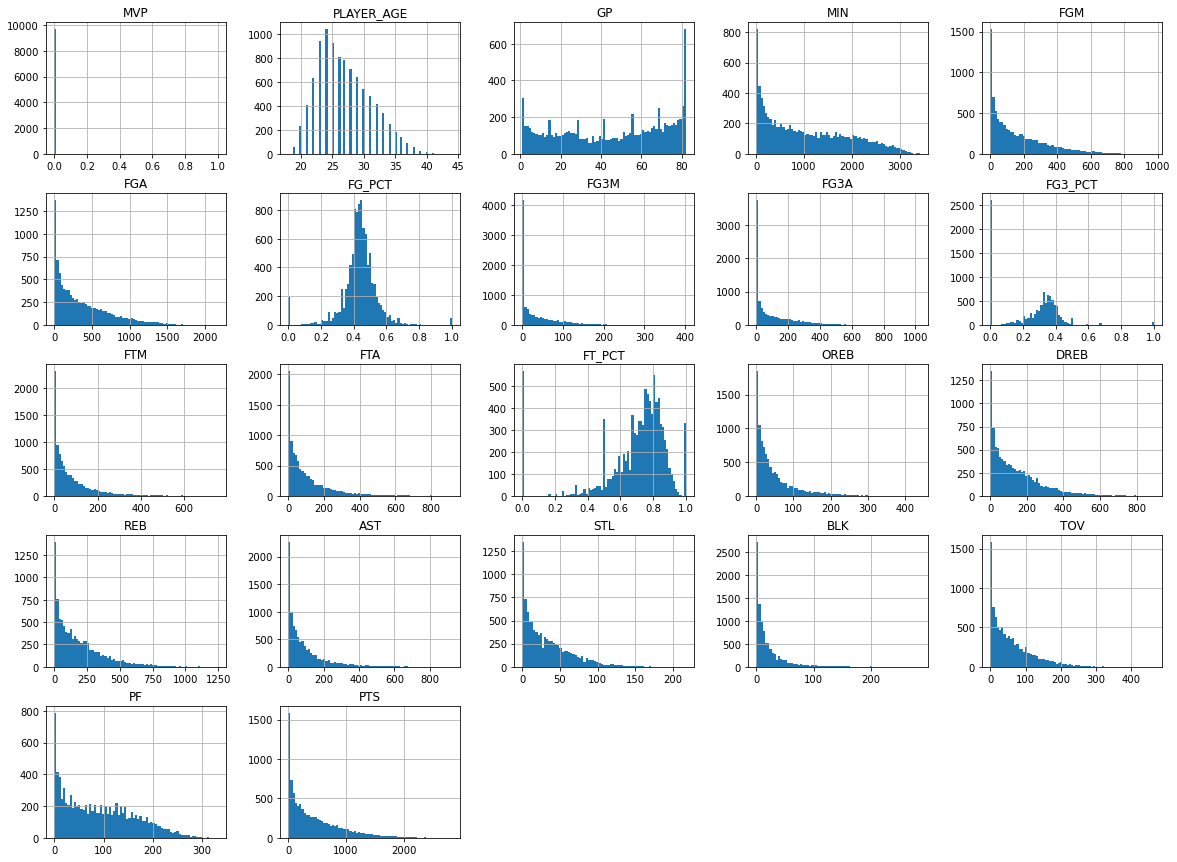

In [9]:
t_hist=total_stats.drop(total_stats.columns[[1,2,3,4]], axis=1)
t_hist.hist(figsize=(20,15),bins=75)
plt.show()

In [73]:
corrmatrix=t_hist.corr()
corrmatrix

,MVP,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
MVP,1.000000,0.000886,0.050070,0.082933,0.141459,0.128439,0.027389,0.098192,0.095521,0.029070,0.166316,0.158154,0.026992,0.042702,0.108835,0.092583,0.159780,0.102850,0.050697,0.142472,0.043042,0.150370
PLAYER_AGE,0.000886,1.000000,0.018071,0.032503,-0.005287,-0.001068,-0.004581,0.070323,0.059695,0.044452,-0.023837,-0.037862,0.091512,-0.038845,0.023720,0.005656,0.060183,0.008091,-0.026024,-0.014334,-0.003152,-0.001636
GP,0.050070,0.018071,1.000000,0.879301,0.753847,0.758788,0.286807,0.518403,0.536246,0.215841,0.616842,0.634143,0.382794,0.606241,0.736365,0.722108,0.582316,0.743252,0.511035,0.730786,0.879334,0.741612
MIN,0.082933,0.032503,0.879301,1.000000,0.929456,0.933983,0.251253,0.630494,0.649293,0.249924,0.807088,0.815698,0.358352,0.635721,0.840646,0.807369,0.744505,0.870238,0.544639,0.889295,0.889080,0.923678
FGM,0.141459,-0.005287,0.753847,0.929456,1.000000,0.989434,0.257935,0.619681,0.637324,0.239341,0.893944,0.893707,0.333935,0.600933,0.820197,0.781901,0.737386,0.809785,0.517802,0.909564,0.791763,0.993179
FGA,0.128439,-0.001068,0.758788,0.933983,0.989434,1.000000,0.200800,0.680337,0.703671,0.278246,0.886325,0.877049,0.355880,0.534550,0.780546,0.732843,0.762917,0.827337,0.458888,0.913491,0.778258,0.990221
FG_PCT,0.027389,-0.004581,0.286807,0.251253,0.257935,0.200800,1.000000,0.003675,-0.009518,0.026836,0.207242,0.237235,0.159313,0.372867,0.324069,0.349783,0.103168,0.175871,0.323896,0.212706,0.315476,0.234469
FG3M,0.098192,0.070323,0.518403,0.630494,0.619681,0.680337,0.003675,1.000000,0.991522,0.482235,0.488710,0.437164,0.345360,0.012049,0.357503,0.265449,0.576853,0.590005,0.045814,0.548548,0.428789,0.666516
FG3A,0.095521,0.059695,0.536246,0.649293,0.637324,0.703671,-0.009518,0.991522,1.000000,0.474670,0.513155,0.463419,0.351511,0.021178,0.372509,0.279192,0.603703,0.619050,0.053998,0.577273,0.444378,0.683884
FG3_PCT,0.029070,0.044452,0.215841,0.249924,0.239341,0.278246,0.026836,0.482235,0.474670,1.000000,0.165747,0.126045,0.333576,-0.153379,0.067689,0.003314,0.283787,0.261754,-0.113863,0.206946,0.105978,0.262568


,MVP,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
MVP,1.000000,0.000886,0.050070,0.082933,0.141459,0.128439,0.027389,0.098192,0.095521,0.029070,0.166316,0.158154,0.026992,0.042702,0.108835,0.092583,0.159780,0.102850,0.050697,0.142472,0.043042,0.150370
PLAYER_AGE,0.000886,1.000000,0.018071,0.032503,-0.005287,-0.001068,-0.004581,0.070323,0.059695,0.044452,-0.023837,-0.037862,0.091512,-0.038845,0.023720,0.005656,0.060183,0.008091,-0.026024,-0.014334,-0.003152,-0.001636
GP,0.050070,0.018071,1.000000,0.879301,0.753847,0.758788,0.286807,0.518403,0.536246,0.215841,0.616842,0.634143,0.382794,0.606241,0.736365,0.722108,0.582316,0.743252,0.511035,0.730786,0.879334,0.741612
MIN,0.082933,0.032503,0.879301,1.000000,0.929456,0.933983,0.251253,0.630494,0.649293,0.249924,0.807088,0.815698,0.358352,0.635721,0.840646,0.807369,0.744505,0.870238,0.544639,0.889295,0.889080,0.923678
FGM,0.141459,-0.005287,0.753847,0.929456,1.000000,0.989434,0.257935,0.619681,0.637324,0.239341,0.893944,0.893707,0.333935,0.600933,0.820197,0.781901,0.737386,0.809785,0.517802,0.909564,0.791763,0.993179
FGA,0.128439,-0.001068,0.758788,0.933983,0.989434,1.000000,0.200800,0.680337,0.703671,0.278246,0.886325,0.877049,0.355880,0.534550,0.780546,0.732843,0.762917,0.827337,0.458888,0.913491,0.778258,0.990221
FG_PCT,0.027389,-0.004581,0.286807,0.251253,0.257935,0.200800,1.000000,0.003675,-0.009518,0.026836,0.207242,0.237235,0.159313,0.372867,0.324069,0.349783,0.103168,0.175871,0.323896,0.212706,0.315476,0.234469
FG3M,0.098192,0.070323,0.518403,0.630494,0.619681,0.680337,0.003675,1.000000,0.991522,0.482235,0.488710,0.437164,0.345360,0.012049,0.357503,0.265449,0.576853,0.590005,0.045814,0.548548,0.428789,0.666516
FG3A,0.095521,0.059695,0.536246,0.649293,0.637324,0.703671,-0.009518,0.991522,1.000000,0.474670,0.513155,0.463419,0.351511,0.021178,0.372509,0.279192,0.603703,0.619050,0.053998,0.577273,0.444378,0.683884
FG3_PCT,0.029070,0.044452,0.215841,0.249924,0.239341,0.278246,0.026836,0.482235,0.474670,1.000000,0.165747,0.126045,0.333576,-0.153379,0.067689,0.003314,0.283787,0.261754,-0.113863,0.206946,0.105978,0.262568


In [74]:
corrmatrix["MVP"][np.abs(np.array(corrmatrix["MVP"])).argsort()][::-1]

MVP           1.000000
FTM           0.166316
AST           0.159780
FTA           0.158154
PTS           0.150370
TOV           0.142472
FGM           0.141459
FGA           0.128439
DREB          0.108835
STL           0.102850
FG3M          0.098192
FG3A          0.095521
REB           0.092583
MIN           0.082933
BLK           0.050697
GP            0.050070
PF            0.043042
OREB          0.042702
FG3_PCT       0.029070
FG_PCT        0.027389
FT_PCT        0.026992
PLAYER_AGE    0.000886
Name: MVP, dtype: float64

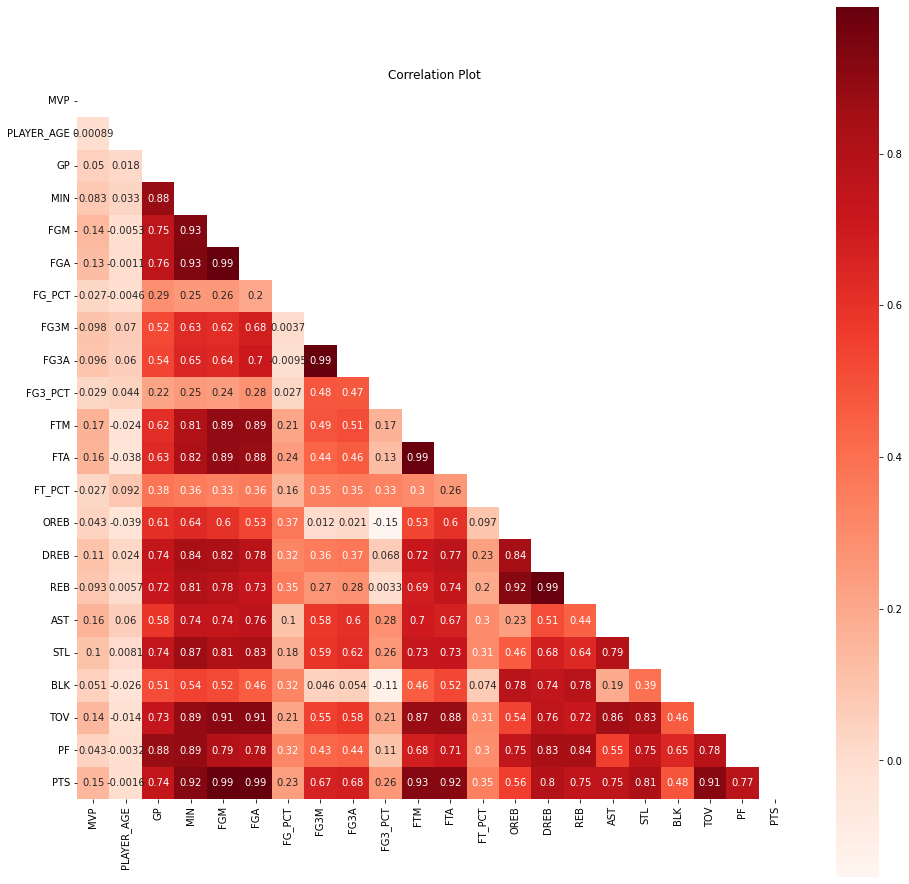

In [12]:
fig, ax =plt.subplots(figsize=(16, 16))
plt.title("Correlation Plot")
sns.heatmap(corrmatrix, mask = np.triu(np.ones_like(corrmatrix, dtype=bool)), cmap=plt.cm.Reds,
            square=True, annot=True, ax=ax)
plt.show()

In [75]:
#How is unbalanced
total_stats["MVP"].value_counts()

0.0    9719
1.0      18
Name: MVP, dtype: int64

In [76]:
total_stats["MVP"].value_counts(normalize=True)

0.0    0.998151
1.0    0.001849
Name: MVP, dtype: float64

/home/thomas/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


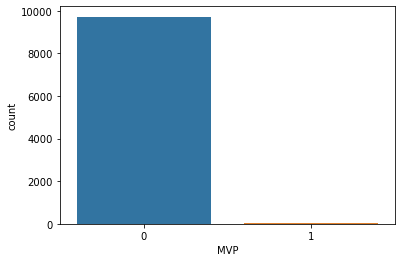

In [15]:
g = sns.countplot(total_stats['MVP'])
g.set_xticklabels(['0','1'])
plt.show()

(array([1195.,  784.,  885.,  743.,  625.,  661.,  834.,  948., 1113.,
        1949.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

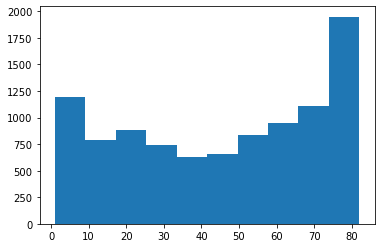

In [16]:
plt.hist(total_stats["GP"])

In [77]:
total_stats=total_stats[total_stats["GP"]>40]

In [78]:
total_stats

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
7,0.0,12,949,2004,1610612737,27.0,53,1955.0,383,790,0.485,5,23,0.217,294,334,0.880,141,354,495,127,44,19,131,147,1065
9,0.0,13,949,2005,1610612757,28.0,54,1868.0,337,670,0.503,15,39,0.385,220,254,0.866,123,269,392,111,49,26,117,150,909
10,0.0,8,949,2006,1610612758,29.0,72,1961.0,332,632,0.525,5,22,0.227,218,278,0.784,106,251,357,149,48,42,108,227,887
11,0.0,11,949,2007,1610612758,30.0,80,2015.0,310,654,0.474,3,20,0.150,170,234,0.726,122,276,398,109,53,40,116,243,793
13,0.0,6,203518,2017,1610612760,23.0,68,1055.0,134,341,0.393,94,247,0.381,44,49,0.898,18,68,86,40,37,8,33,114,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,0.0,13,1627835,2018,1610612741,24.0,54,824.0,81,234,0.346,37,110,0.336,19,25,0.760,13,118,131,46,20,15,43,86,218
5973,0.0,14,1627790,2019,1610612739,22.0,59,1082.0,183,331,0.553,0,0,0.000,93,132,0.705,108,212,320,53,13,22,61,113,459
5976,0.0,11,1627826,2018,1610612747,21.0,43,410.0,61,122,0.500,0,1,0.000,39,51,0.765,45,78,123,25,8,15,26,47,161
5979,0.0,2,1627826,2020,1610612746,23.0,72,1326.0,236,385,0.613,0,2,0.000,124,166,0.747,197,346,543,82,16,66,61,168,596


In [79]:
total_stats["MVP"].value_counts()

0.0    5582
1.0      18
Name: MVP, dtype: int64

In [19]:
total_stats["MVP"].value_counts(normalize=True)

0.0    0.998151
1.0    0.001849
Name: MVP, dtype: float64

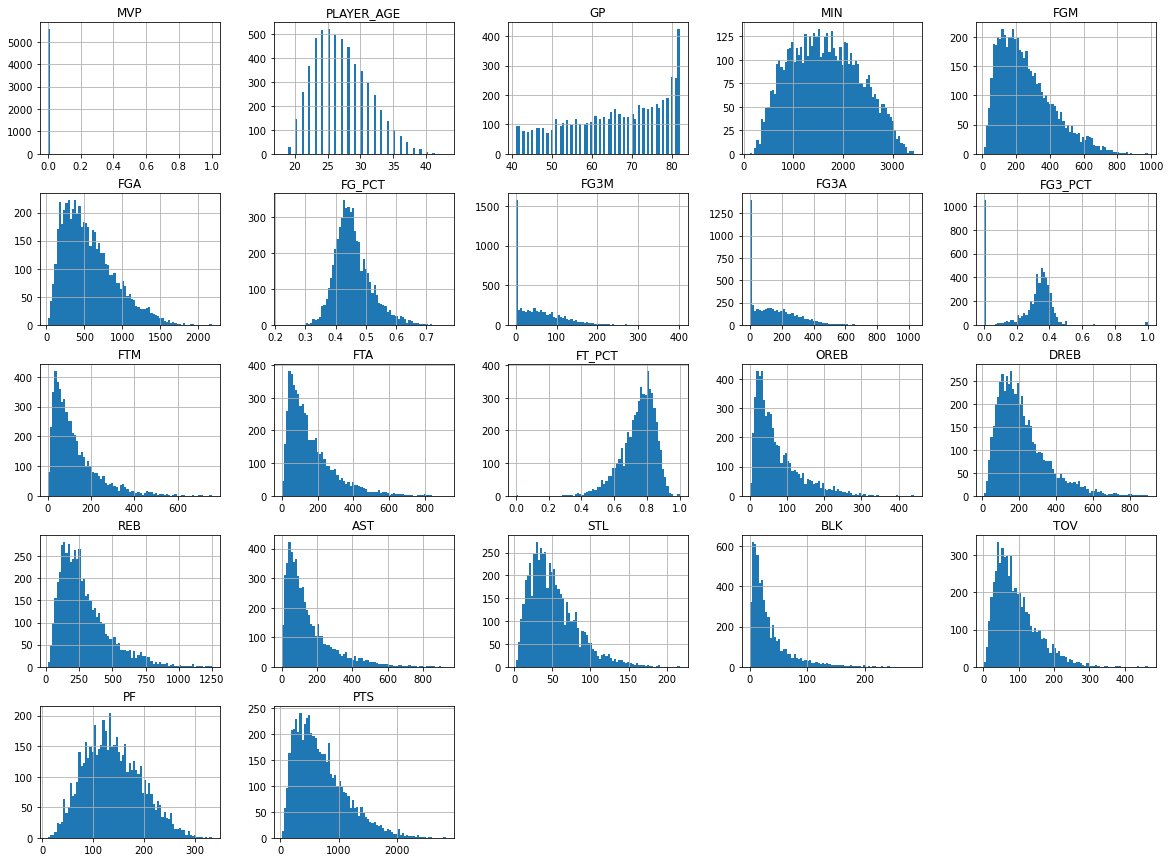

In [21]:
#come cambia la distribuzione dopo aver tolto GP<40
t_hist=total_stats.drop(total_stats.columns[[1,2,3,4]], axis=1)
t_hist.hist(figsize=(20,15),bins=75)
plt.show()

In [80]:
corrmatrix=t_hist.corr()

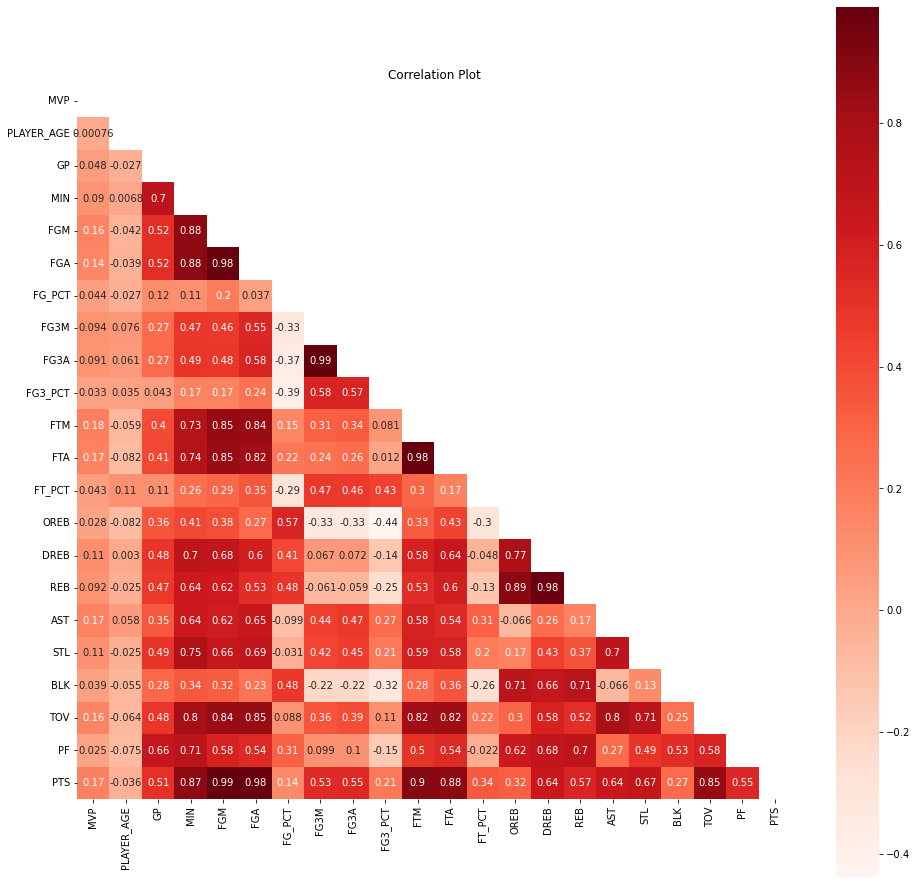

In [23]:
fig, ax =plt.subplots(figsize=(16, 16))
plt.title("Correlation Plot")
sns.heatmap(corrmatrix, mask = np.triu(np.ones_like(corrmatrix, dtype=bool)), cmap=plt.cm.Reds,
            square=True, annot=True, ax=ax)
plt.show()

# PREPROCESSING

In [24]:
#divido il dataset 

In [81]:
season_2021=total_stats[total_stats["SEASON_ID"]==2021]

In [82]:
season_2021

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
16,0.0,6,1630173,2021,1610612748,21.0,61,737.0,124,228,0.544,0,1,0.000,56,110,0.509,73,135,208,29,20,28,43,91,304
43,0.0,11,203500,2021,1610612740,27.0,58,1605.0,189,308,0.614,0,3,0.000,60,135,0.444,213,301,514,111,54,38,78,113,438
48,0.0,6,1628389,2021,1610612748,23.0,64,2143.0,456,800,0.570,2,8,0.250,283,354,0.799,142,431,573,346,75,66,169,145,1197
131,0.0,11,1629638,2021,1610612740,22.0,46,1007.0,192,458,0.419,76,219,0.347,48,66,0.727,13,131,144,102,47,22,69,88,508
136,0.0,8,1628960,2021,1610612763,25.0,50,1260.0,173,414,0.418,107,274,0.391,79,91,0.868,19,141,160,108,46,8,48,71,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,0.0,15,1626174,2021,1610612745,25.0,41,1326.0,329,640,0.514,77,206,0.374,125,198,0.631,76,319,395,71,34,48,80,88,860
5935,0.0,11,201152,2021,1610612741,33.0,68,1652.0,370,662,0.559,12,45,0.267,71,113,0.628,168,255,423,291,74,40,137,152,823
5939,0.0,5,1629027,2021,1610612737,22.0,63,2125.0,487,1112,0.438,136,397,0.343,484,546,0.886,38,207,245,594,53,12,261,111,1594
5949,0.0,10,203469,2021,1610612766,28.0,48,1005.0,181,324,0.559,4,28,0.143,85,119,0.714,119,209,328,86,27,17,51,121,451


In [83]:
#creo nuovo dataframe per i modelli
df=total_stats[total_stats["SEASON_ID"]<2021]
df

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
7,0.0,12,949,2004,1610612737,27.0,53,1955.0,383,790,0.485,5,23,0.217,294,334,0.880,141,354,495,127,44,19,131,147,1065
9,0.0,13,949,2005,1610612757,28.0,54,1868.0,337,670,0.503,15,39,0.385,220,254,0.866,123,269,392,111,49,26,117,150,909
10,0.0,8,949,2006,1610612758,29.0,72,1961.0,332,632,0.525,5,22,0.227,218,278,0.784,106,251,357,149,48,42,108,227,887
11,0.0,11,949,2007,1610612758,30.0,80,2015.0,310,654,0.474,3,20,0.150,170,234,0.726,122,276,398,109,53,40,116,243,793
13,0.0,6,203518,2017,1610612760,23.0,68,1055.0,134,341,0.393,94,247,0.381,44,49,0.898,18,68,86,40,37,8,33,114,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,0.0,8,1627835,2017,1610612741,23.0,44,843.0,88,221,0.398,33,99,0.333,31,40,0.775,15,110,125,36,15,16,40,78,240
5971,0.0,13,1627835,2018,1610612741,24.0,54,824.0,81,234,0.346,37,110,0.336,19,25,0.760,13,118,131,46,20,15,43,86,218
5973,0.0,14,1627790,2019,1610612739,22.0,59,1082.0,183,331,0.553,0,0,0.000,93,132,0.705,108,212,320,53,13,22,61,113,459
5976,0.0,11,1627826,2018,1610612747,21.0,43,410.0,61,122,0.500,0,1,0.000,39,51,0.765,45,78,123,25,8,15,26,47,161


In [84]:
#separo labels da features
labels = df['MVP']
features= df.drop('MVP', axis = 1)
features

,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
7,12,949,2004,1610612737,27.0,53,1955.0,383,790,0.485,5,23,0.217,294,334,0.880,141,354,495,127,44,19,131,147,1065
9,13,949,2005,1610612757,28.0,54,1868.0,337,670,0.503,15,39,0.385,220,254,0.866,123,269,392,111,49,26,117,150,909
10,8,949,2006,1610612758,29.0,72,1961.0,332,632,0.525,5,22,0.227,218,278,0.784,106,251,357,149,48,42,108,227,887
11,11,949,2007,1610612758,30.0,80,2015.0,310,654,0.474,3,20,0.150,170,234,0.726,122,276,398,109,53,40,116,243,793
13,6,203518,2017,1610612760,23.0,68,1055.0,134,341,0.393,94,247,0.381,44,49,0.898,18,68,86,40,37,8,33,114,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,8,1627835,2017,1610612741,23.0,44,843.0,88,221,0.398,33,99,0.333,31,40,0.775,15,110,125,36,15,16,40,78,240
5971,13,1627835,2018,1610612741,24.0,54,824.0,81,234,0.346,37,110,0.336,19,25,0.760,13,118,131,46,20,15,43,86,218
5973,14,1627790,2019,1610612739,22.0,59,1082.0,183,331,0.553,0,0,0.000,93,132,0.705,108,212,320,53,13,22,61,113,459
5976,11,1627826,2018,1610612747,21.0,43,410.0,61,122,0.500,0,1,0.000,39,51,0.765,45,78,123,25,8,15,26,47,161


In [85]:
#divido train e test --> dobbiamo decidere grandezza test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [86]:
#standardizzazione i nostri dati per anno
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

num_cols=df.columns
num_cols=num_cols.drop(["MVP",'CONF_RANK', 'PLAYER_ID', 'SEASON_ID', 'TEAM_ID'])
num_cols

train_data=pd.DataFrame()
train_data = pd.concat([train_data, train_features],axis=0,ignore_index=True)

test_data=pd.DataFrame()
test_data = pd.concat([test_data, test_features],axis=0,ignore_index=True)


In [87]:
for year in  train_data["SEASON_ID"].unique().tolist():
    for col in num_cols.tolist():
        train_data.loc[train_data['SEASON_ID']==year, col]=scaler.fit_transform(train_features.loc[train_features['SEASON_ID']==year, col].to_numpy().reshape(-1,1))
                  
        test_data.loc[test_data['SEASON_ID']==year, col]=scaler.transform(test_features.loc[test_features['SEASON_ID']==year, col].to_numpy().reshape(-1,1))
        

In [88]:
train_data

,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,10,201564,2013,1610612742,-0.496540,1.199290,1.736832,1.260725,1.355585,-0.089658,1.720226,1.524776,0.811265,0.677822,0.602640,0.713964,-0.608101,0.334820,0.029007,1.440967,1.228266,-0.313884,1.876196,1.149004,1.295004
1,6,2574,2008,1610612761,0.003063,0.985733,-0.322664,-0.213254,-0.309183,0.603388,0.112721,-0.149534,1.369023,-0.875164,-0.942688,1.087970,-0.778753,-0.936196,-0.929737,-0.638334,-0.624750,-0.811103,-0.698497,-0.356411,-0.361992
2,14,201171,2011,1610612758,0.022444,-1.075367,-0.367534,-0.136313,-0.228135,0.498849,-0.903562,-0.923286,-1.419987,0.205638,0.294219,-0.178620,0.726620,-0.647973,-0.210996,-0.669211,-0.644638,-0.397552,-0.216305,-0.303334,-0.142241
3,10,2365,2015,1610612748,2.043189,-0.372494,-0.692677,-0.899404,-1.132817,2.163067,-0.952204,-1.007593,0.265267,-0.368025,-0.273752,-0.679554,0.066238,0.056059,0.061755,-0.815591,-0.774734,0.831067,-0.915323,-0.853673,-0.883944
4,7,970,2006,1610612741,1.239266,0.350888,-1.104292,-0.675173,-0.754962,0.790102,-0.818789,-0.872847,-1.430396,-0.485524,-0.394880,-0.982542,-0.432327,-0.833728,-0.745543,-0.737817,-1.295876,-0.550694,-0.594142,-0.472181,-0.686942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,12,201567,2012,1610612750,-0.957682,-0.288091,1.379520,2.016596,2.126653,0.034554,1.620266,1.584693,0.654487,3.308680,3.098913,0.695277,2.829631,3.000783,3.138106,-0.132636,0.052206,-0.072482,0.964024,0.993551,2.477732
4248,11,1563,2009,1610612750,2.180144,-1.496141,-1.195469,-1.230987,-1.222527,-0.881412,-0.952639,-1.008976,-1.677100,-0.520884,-0.579901,0.676031,-1.033037,-1.120397,-1.146661,-0.276038,-1.129514,-0.813555,-1.086845,-1.193694,-1.119941
4249,9,2590,2013,1610612762,0.714871,-1.645118,-0.311595,-0.196508,-0.109077,-0.415018,0.174034,0.120784,0.674589,-0.446220,-0.578189,1.275668,-0.793348,-0.926666,-0.931898,0.913293,-0.189608,-0.690341,0.474988,-0.481507,-0.228064
4250,1,1897,2010,1610612747,0.746692,0.707489,1.167872,0.205121,0.457653,-0.864822,1.156971,1.271179,0.578251,-0.039191,0.081083,-0.416829,0.302377,0.047648,0.131779,0.535826,1.693336,-0.406375,0.406321,0.282730,0.270553


In [89]:
train_l=pd.DataFrame()
train_l = pd.concat([train_l, train_labels],axis=0,ignore_index=True)
train_l

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4247,0.0
4248,0.0
4249,0.0
4250,0.0


season_2021 contiene i dati del 2021. 
df contiene i dati fino al 2020. 
train_features e test_features contengono i dati non standardizzati. 
train_data e test_data contengono i dati standardizzati. 
train_labels e test_labels contengo gli MVP. 
train contiene train_data e train_labels

In [90]:
#correlation matrix solo del training e tolgo quelle piu correlate 
train=pd.DataFrame()
train = pd.concat([train_l,train_data],axis=1, ignore_index=False)

train = train.rename(columns={0: "MVP"})
train

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,0.0,10,201564,2013,1610612742,-0.496540,1.199290,1.736832,1.260725,1.355585,-0.089658,1.720226,1.524776,0.811265,0.677822,0.602640,0.713964,-0.608101,0.334820,0.029007,1.440967,1.228266,-0.313884,1.876196,1.149004,1.295004
1,0.0,6,2574,2008,1610612761,0.003063,0.985733,-0.322664,-0.213254,-0.309183,0.603388,0.112721,-0.149534,1.369023,-0.875164,-0.942688,1.087970,-0.778753,-0.936196,-0.929737,-0.638334,-0.624750,-0.811103,-0.698497,-0.356411,-0.361992
2,0.0,14,201171,2011,1610612758,0.022444,-1.075367,-0.367534,-0.136313,-0.228135,0.498849,-0.903562,-0.923286,-1.419987,0.205638,0.294219,-0.178620,0.726620,-0.647973,-0.210996,-0.669211,-0.644638,-0.397552,-0.216305,-0.303334,-0.142241
3,0.0,10,2365,2015,1610612748,2.043189,-0.372494,-0.692677,-0.899404,-1.132817,2.163067,-0.952204,-1.007593,0.265267,-0.368025,-0.273752,-0.679554,0.066238,0.056059,0.061755,-0.815591,-0.774734,0.831067,-0.915323,-0.853673,-0.883944
4,0.0,7,970,2006,1610612741,1.239266,0.350888,-1.104292,-0.675173,-0.754962,0.790102,-0.818789,-0.872847,-1.430396,-0.485524,-0.394880,-0.982542,-0.432327,-0.833728,-0.745543,-0.737817,-1.295876,-0.550694,-0.594142,-0.472181,-0.686942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,0.0,12,201567,2012,1610612750,-0.957682,-0.288091,1.379520,2.016596,2.126653,0.034554,1.620266,1.584693,0.654487,3.308680,3.098913,0.695277,2.829631,3.000783,3.138106,-0.132636,0.052206,-0.072482,0.964024,0.993551,2.477732
4248,0.0,11,1563,2009,1610612750,2.180144,-1.496141,-1.195469,-1.230987,-1.222527,-0.881412,-0.952639,-1.008976,-1.677100,-0.520884,-0.579901,0.676031,-1.033037,-1.120397,-1.146661,-0.276038,-1.129514,-0.813555,-1.086845,-1.193694,-1.119941
4249,0.0,9,2590,2013,1610612762,0.714871,-1.645118,-0.311595,-0.196508,-0.109077,-0.415018,0.174034,0.120784,0.674589,-0.446220,-0.578189,1.275668,-0.793348,-0.926666,-0.931898,0.913293,-0.189608,-0.690341,0.474988,-0.481507,-0.228064
4250,0.0,1,1897,2010,1610612747,0.746692,0.707489,1.167872,0.205121,0.457653,-0.864822,1.156971,1.271179,0.578251,-0.039191,0.081083,-0.416829,0.302377,0.047648,0.131779,0.535826,1.693336,-0.406375,0.406321,0.282730,0.270553


In [91]:
t_hist_stand=train.drop(train.columns[[1,2,3,4]], axis=1)
corrmatrix=t_hist_stand.corr()

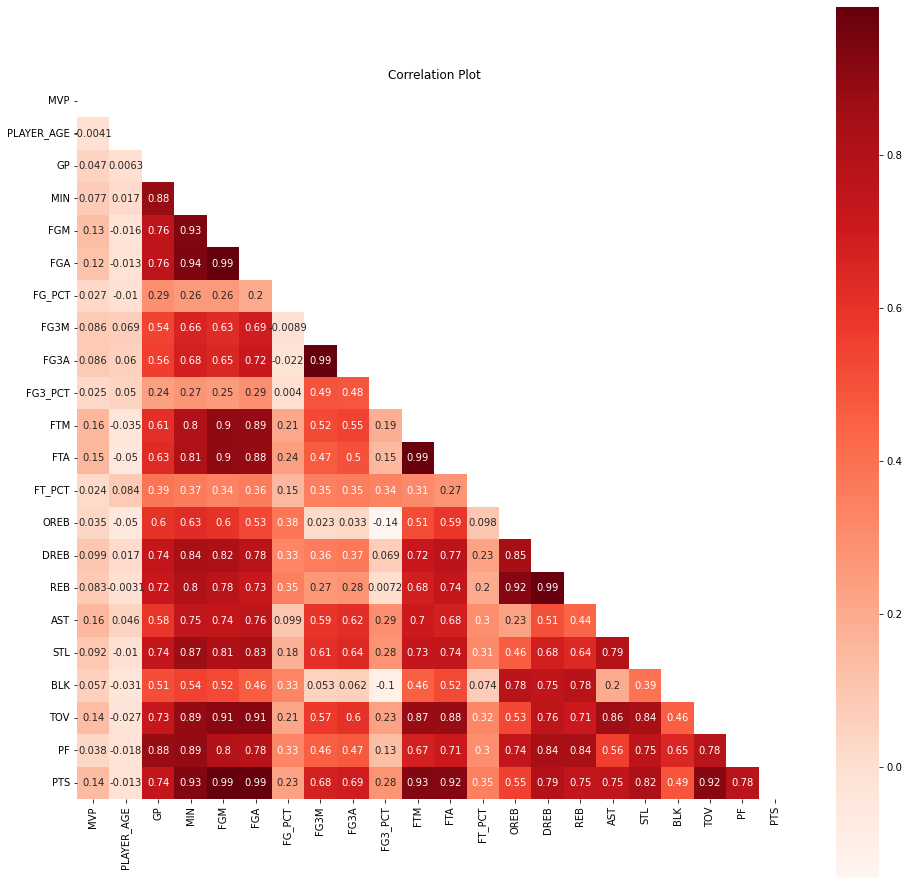

In [37]:
fig, ax =plt.subplots(figsize=(16, 16))
plt.title("Correlation Plot")
sns.heatmap(corrmatrix, mask = np.triu(np.ones_like(corrmatrix, dtype=bool)), cmap=plt.cm.Reds,
            square=True, annot=True, ax=ax)
plt.show()

In [92]:
X_corr = train_data.corr()
corr_names = set()

for i in range(len(X_corr .columns)):
    for j in range(i):
        if abs(X_corr.iloc[i, j]) > 0.9:
            col = X_corr.columns[i]
            corr_names.add(col)

train_data.drop(columns=corr_names,inplace=True)
test_data.drop(columns=corr_names,inplace=True)

In [93]:
corr_names

# le features tolte con correlazione maggiore di 0.9 sono:{'FG3A', 'FGA', 'FTA', 'PTS', 'REB'}

{'FG3A', 'FGA', 'FTA', 'PTS', 'REB'}

In [94]:
train_data

,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF
0,10,201564,2013,1610612742,-0.496540,1.199290,1.736832,1.260725,-0.089658,1.720226,0.811265,0.677822,0.713964,-0.608101,0.334820,1.440967,1.228266,-0.313884,1.876196,1.149004
1,6,2574,2008,1610612761,0.003063,0.985733,-0.322664,-0.213254,0.603388,0.112721,1.369023,-0.875164,1.087970,-0.778753,-0.936196,-0.638334,-0.624750,-0.811103,-0.698497,-0.356411
2,14,201171,2011,1610612758,0.022444,-1.075367,-0.367534,-0.136313,0.498849,-0.903562,-1.419987,0.205638,-0.178620,0.726620,-0.647973,-0.669211,-0.644638,-0.397552,-0.216305,-0.303334
3,10,2365,2015,1610612748,2.043189,-0.372494,-0.692677,-0.899404,2.163067,-0.952204,0.265267,-0.368025,-0.679554,0.066238,0.056059,-0.815591,-0.774734,0.831067,-0.915323,-0.853673
4,7,970,2006,1610612741,1.239266,0.350888,-1.104292,-0.675173,0.790102,-0.818789,-1.430396,-0.485524,-0.982542,-0.432327,-0.833728,-0.737817,-1.295876,-0.550694,-0.594142,-0.472181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,12,201567,2012,1610612750,-0.957682,-0.288091,1.379520,2.016596,0.034554,1.620266,0.654487,3.308680,0.695277,2.829631,3.000783,-0.132636,0.052206,-0.072482,0.964024,0.993551
4248,11,1563,2009,1610612750,2.180144,-1.496141,-1.195469,-1.230987,-0.881412,-0.952639,-1.677100,-0.520884,0.676031,-1.033037,-1.120397,-0.276038,-1.129514,-0.813555,-1.086845,-1.193694
4249,9,2590,2013,1610612762,0.714871,-1.645118,-0.311595,-0.196508,-0.415018,0.174034,0.674589,-0.446220,1.275668,-0.793348,-0.926666,0.913293,-0.189608,-0.690341,0.474988,-0.481507
4250,1,1897,2010,1610612747,0.746692,0.707489,1.167872,0.205121,-0.864822,1.156971,0.578251,-0.039191,-0.416829,0.302377,0.047648,0.535826,1.693336,-0.406375,0.406321,0.282730


## SMOTE

In [95]:
train.drop(columns=corr_names,inplace=True)
train

,MVP,CONF_RANK,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF
0,0.0,10,201564,2013,1610612742,-0.496540,1.199290,1.736832,1.260725,-0.089658,1.720226,0.811265,0.677822,0.713964,-0.608101,0.334820,1.440967,1.228266,-0.313884,1.876196,1.149004
1,0.0,6,2574,2008,1610612761,0.003063,0.985733,-0.322664,-0.213254,0.603388,0.112721,1.369023,-0.875164,1.087970,-0.778753,-0.936196,-0.638334,-0.624750,-0.811103,-0.698497,-0.356411
2,0.0,14,201171,2011,1610612758,0.022444,-1.075367,-0.367534,-0.136313,0.498849,-0.903562,-1.419987,0.205638,-0.178620,0.726620,-0.647973,-0.669211,-0.644638,-0.397552,-0.216305,-0.303334
3,0.0,10,2365,2015,1610612748,2.043189,-0.372494,-0.692677,-0.899404,2.163067,-0.952204,0.265267,-0.368025,-0.679554,0.066238,0.056059,-0.815591,-0.774734,0.831067,-0.915323,-0.853673
4,0.0,7,970,2006,1610612741,1.239266,0.350888,-1.104292,-0.675173,0.790102,-0.818789,-1.430396,-0.485524,-0.982542,-0.432327,-0.833728,-0.737817,-1.295876,-0.550694,-0.594142,-0.472181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,0.0,12,201567,2012,1610612750,-0.957682,-0.288091,1.379520,2.016596,0.034554,1.620266,0.654487,3.308680,0.695277,2.829631,3.000783,-0.132636,0.052206,-0.072482,0.964024,0.993551
4248,0.0,11,1563,2009,1610612750,2.180144,-1.496141,-1.195469,-1.230987,-0.881412,-0.952639,-1.677100,-0.520884,0.676031,-1.033037,-1.120397,-0.276038,-1.129514,-0.813555,-1.086845,-1.193694
4249,0.0,9,2590,2013,1610612762,0.714871,-1.645118,-0.311595,-0.196508,-0.415018,0.174034,0.674589,-0.446220,1.275668,-0.793348,-0.926666,0.913293,-0.189608,-0.690341,0.474988,-0.481507
4250,0.0,1,1897,2010,1610612747,0.746692,0.707489,1.167872,0.205121,-0.864822,1.156971,0.578251,-0.039191,-0.416829,0.302377,0.047648,0.535826,1.693336,-0.406375,0.406321,0.282730


In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
training_data = train #Mettere solo Train e non test

mvp = training_data["MVP"]

data_to_over = training_data.drop(["MVP","PLAYER_ID", "SEASON_ID", "TEAM_ID", "PLAYER_AGE"], axis=1)

oversample = SMOTE(sampling_strategy=0.2, random_state=23)
X, y = oversample.fit_resample(data_to_over, mvp)

over_train_data = pd.concat([X, y], axis=1)
over_train_data = over_train_data[["GP", "MIN", "FGM", "FG_PCT", "FG3M", "FG3_PCT", "FTM", "FT_PCT", "OREB", "DREB", "AST", "STL", "BLK", "TOV", "PF", 'CONF_RANK', "MVP"]]
over_train_data[over_train_data["MVP"]==1]

,GP,MIN,FGM,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF,CONF_RANK,MVP
182,0.955125,1.573844,3.414702,0.767681,5.795796,1.055938,2.309888,1.432043,-0.093157,0.887673,2.726282,3.418644,-0.579875,2.773245,0.479678,1.0,1.0
495,0.909325,1.348627,1.645642,1.106294,2.128275,1.111218,0.906808,1.847282,-0.549621,0.559401,4.576079,0.282415,-0.577600,3.099345,-0.657626,3.0,1.0
1175,1.112023,1.820340,2.723916,-0.289759,1.801110,0.479402,3.012722,1.050123,0.033055,0.241887,3.025126,1.010358,0.450811,2.949375,-0.105086,1.0,1.0
1724,0.611764,1.731520,3.189888,1.501294,0.343191,0.594978,3.405550,0.240242,0.470701,1.980044,2.356018,2.747801,0.637639,2.761596,-0.410426,2.0,1.0
2164,1.075900,1.727533,3.092168,0.596424,1.686563,0.395494,3.821325,0.169794,0.463627,2.148348,3.045036,2.793848,1.604251,2.496704,-0.138289,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.766843,1.599420,2.845750,0.710325,1.087266,0.691248,3.646048,0.904636,0.346569,2.287260,2.028965,1.131894,0.974999,1.884612,-0.046601,1.0,1.0
5084,0.999448,1.643478,3.219558,0.468960,4.667319,0.893070,2.508435,1.324153,-0.057503,0.705242,2.810703,2.738316,-0.288712,2.823001,0.314486,1.0,1.0
5085,0.694732,1.661732,3.062694,0.652690,1.646793,0.434758,4.041050,0.227241,-0.040915,1.834747,3.288422,2.358577,1.232693,2.687081,-0.428183,1.0,1.0
5086,0.556847,1.600941,2.885922,0.349627,2.194633,0.426637,4.570533,0.497832,-0.217678,1.466901,3.483478,2.351454,0.965582,3.166356,-0.036322,1.0,1.0


In [98]:
over_train_data

,GP,MIN,FGM,FG_PCT,FG3M,FG3_PCT,FTM,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF,CONF_RANK,MVP
0,1.199290,1.736832,1.260725,-0.089658,1.720226,0.811265,0.677822,0.713964,-0.608101,0.334820,1.440967,1.228266,-0.313884,1.876196,1.149004,10.0,0.0
1,0.985733,-0.322664,-0.213254,0.603388,0.112721,1.369023,-0.875164,1.087970,-0.778753,-0.936196,-0.638334,-0.624750,-0.811103,-0.698497,-0.356411,6.0,0.0
2,-1.075367,-0.367534,-0.136313,0.498849,-0.903562,-1.419987,0.205638,-0.178620,0.726620,-0.647973,-0.669211,-0.644638,-0.397552,-0.216305,-0.303334,14.0,0.0
3,-0.372494,-0.692677,-0.899404,2.163067,-0.952204,0.265267,-0.368025,-0.679554,0.066238,0.056059,-0.815591,-0.774734,0.831067,-0.915323,-0.853673,10.0,0.0
4,0.350888,-1.104292,-0.675173,0.790102,-0.818789,-1.430396,-0.485524,-0.982542,-0.432327,-0.833728,-0.737817,-1.295876,-0.550694,-0.594142,-0.472181,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,0.766843,1.599420,2.845750,0.710325,1.087266,0.691248,3.646048,0.904636,0.346569,2.287260,2.028965,1.131894,0.974999,1.884612,-0.046601,1.0,1.0
5084,0.999448,1.643478,3.219558,0.468960,4.667319,0.893070,2.508435,1.324153,-0.057503,0.705242,2.810703,2.738316,-0.288712,2.823001,0.314486,1.0,1.0
5085,0.694732,1.661732,3.062694,0.652690,1.646793,0.434758,4.041050,0.227241,-0.040915,1.834747,3.288422,2.358577,1.232693,2.687081,-0.428183,1.0,1.0
5086,0.556847,1.600941,2.885922,0.349627,2.194633,0.426637,4.570533,0.497832,-0.217678,1.466901,3.483478,2.351454,0.965582,3.166356,-0.036322,1.0,1.0


In [99]:
print(over_train_data["MVP"].value_counts(normalize=True))

0.0    0.833333
1.0    0.166667
Name: MVP, dtype: float64


In [100]:
print(over_train_data["MVP"].value_counts())

0.0    4240
1.0     848
Name: MVP, dtype: int64


In [102]:
#Save Over_train_data
with open("over_train_data.pkl",'wb') as f:
    pickle.dump(over_train_data,f)

# LOGISTIC REGRESSSION

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=10000,random_state=18)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
with open("over_train_data.pkl",'rb') as f:
    over_train_data = pickle.load(f)

train_labels = over_train_data['MVP']
train_data= over_train_data.drop('MVP', axis = 1)

In [126]:
#cross validation con leave one out facendo smote usando solo il train RandomSearchCV
penalty=['l1', 'l2', 'elasticnet',]
C = uniform(loc=0, scale=1)
class_weight=['balanced', 'None']
solver = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] 
rs_parameters = {'C': C,
                 'solver' : solver,
                 #'penalty' : penalty,
                 #'class_weight' : class_weight
                 }

In [127]:
#faccio fit logistic con cross validation
#trovo best_param e best_score
rs=RandomizedSearchCV(log_reg, rs_parameters, scoring="accuracy", n_jobs=4, n_iter=250, random_state=756)
rs_lr = rs.fit(train_data, train_labels)

In [128]:
print("The best score is",rs_lr.best_score_)
print("The best parameters are", rs_lr.best_params_)

The best score is 0.9962660314921387
The best parameters are {'C': 0.6817649539748465, 'solver': 'saga'}


In [134]:
#fit su train con pramaetri trovati
log_reg_final=LogisticRegression(solver="newton-cg",C=0.9322,class_weight="balanced", max_iter=10000,random_state=13)
#log_reg_final=LogisticRegression(solver="saga",C=0.9962660314921387,class_weight="balanced", max_iter=10000,random_state=13)

log_reg_final.fit(train_data, train_labels)
#print("This fitting of the Logistic Regression Classifier without PCA took ",time.time()-start,"seconds")

with open("log_reg.pkl",'wb') as f:
    pickle.dump(log_reg_final,f)

In [130]:
test_data=test_data.drop(["PLAYER_AGE", "PLAYER_ID", "SEASON_ID", "TEAM_ID"], axis=1)
test_data

KeyError: "['PLAYER_AGE' 'PLAYER_ID' 'SEASON_ID' 'TEAM_ID'] not found in axis"

In [135]:
#predict su test
pred_lr = log_reg_final.predict(test_data)
print(f"The accuracy of the Logistic Regressor is  {accuracy_score(test_labels,pred_lr)}")

The accuracy of the Logistic Regressor is  0.9680150517403575


/home/thomas/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [112]:
#valutazione della prediction
confusion_matrix(test_labels,pred_lr)

array([[1028,   30],
       [   4,    1]])

In [115]:
print(classification_report(test_labels,pred_lr))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1058
         1.0       0.03      0.20      0.06         5

    accuracy                           0.97      1063
   macro avg       0.51      0.59      0.52      1063
weighted avg       0.99      0.97      0.98      1063



# RANDOM FOREST

# SVM